***Installing packages***

In [5]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
usertable= pd.read_csv("C:/Users/davja/Downloads/user_table.csv")
usertable.head()

,user_id,city,country,lat,long
0,510335,Peabody,USA,42.53,-70.97
1,89568,Reno,USA,39.54,-119.82
2,434134,Rialto,USA,34.11,-117.39
3,289769,Carson City,USA,39.15,-119.74
4,939586,Chicago,USA,41.84,-87.68


***Exploring the dataset***

In [7]:
usertable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275616 entries, 0 to 275615
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  275616 non-null  int64  
 1   city     275616 non-null  object 
 2   country  275616 non-null  object 
 3   lat      275616 non-null  float64
 4   long     275616 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 10.5+ MB


In [8]:
usertable.describe()

,user_id,lat,long
count,275616.000000,275616.000000,275616.000000
mean,499245.801521,37.111680,-93.981772
std,288533.458944,5.209627,18.086486
min,3.000000,19.700000,-157.800000
25%,249544.500000,33.660000,-112.200000
50%,498861.000000,37.740000,-88.930000
75%,748856.500000,40.700000,-78.910000
max,999999.000000,61.180000,30.310000


In [9]:
usertable.isnull().sum()

user_id    0
city       0
country    0
lat        0
long       0
dtype: int64

In [10]:
testresult= pd.read_csv("C:/Users/davja/Downloads/test_results.csv", parse_dates=['timestamp']) #converting strings into datetime object
testresult.head()

,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0


In [11]:
testresult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_id           316800 non-null  int64 
 1   timestamp         316800 non-null  object
 2   source            316800 non-null  object
 3   device            316800 non-null  object
 4   operative_system  316800 non-null  object
 5   test              316800 non-null  int64 
 6   price             316800 non-null  int64 
 7   converted         316800 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 19.3+ MB


In [12]:
testresult.describe()

,user_id,test,price,converted
count,316800.000000,316800.000000,316800.000000,316800.000000
mean,499281.341840,0.360079,46.205051,0.018333
std,288591.154044,0.480024,9.601487,0.134154
min,3.000000,0.000000,39.000000,0.000000
25%,249525.750000,0.000000,39.000000,0.000000
50%,499021.500000,0.000000,39.000000,0.000000
75%,749025.500000,1.000000,59.000000,0.000000
max,1000000.000000,1.000000,59.000000,1.000000


In [13]:
testresult.isnull().sum()

user_id             0
timestamp           0
source              0
device              0
operative_system    0
test                0
price               0
converted           0
dtype: int64

<span style="color: blue;">**I. Data processing and cleaning**</span>

In [14]:
#check uniquess
print('usertable:', usertable['user_id'].unique().shape)
print('testresult:', usertable['user_id'].unique().shape)

usertable: (275616,)
testresult: (275616,)


In [15]:
# merge test_results with user_table
df = pd.merge(left=testresult, right=usertable, how='left', on='user_id')
df.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02


In [16]:
# Check the price is consisted with types of tests
df[['price', 'test', 'user_id']].groupby(['test', 'price']).count()

user_id
test price         
0    39      202517
     59         210
1    39         155
     59      113918

<span style="color: red;">**It looks like that prices are not consisted with tests. For instance, 'Test 0' has two price tags**</span>

In [17]:
# Ensure that the dataset is valid
df = df[((df['test']==0) & (df['price']==39)) | ((df['test']==1) & (df['price']==59))]
df[['price', 'test', 'user_id']].groupby(['test', 'price']).count()

,,user_id
test,price,
0,39,202517
1,59,113918


In [44]:
# create new column called `revenue`
df['revenue'] = df['converted'] * df['price']
df.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long,revenue
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02,0


In [25]:
# create new column called `revenue`
df['revenue'] = df['converted'] * df['price']
df.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long,revenue
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02,0


In [18]:
df.isnull().sum()

user_id                 0
timestamp               0
source                  0
device                  0
operative_system        0
test                    0
price                   0
converted               0
city                41141
country             41141
lat                 41141
long                41141
dtype: int64

<span style="color: blue;">**II. Data Visualization**</span>

<span style='color: black; font-size: 24px;'>**1.Source**</span>

In [26]:
#Check randomniess
r=df.groupby('test')['source'].apply(lambda x: x.value_counts(normalize=True)).unstack()
r

,ads-bing,ads-google,ads-yahoo,ads_facebook,ads_other,direct_traffic,friend_referral,seo-bing,seo-google,seo-other,seo-yahoo,seo_facebook
test,,,,,,,,,,,,
0,0.072014,0.186873,0.023761,0.168253,0.095083,0.191154,0.064790,0.006562,0.074502,0.029030,0.021509,0.066468
1,0.072394,0.188706,0.024219,0.169253,0.092786,0.189259,0.066337,0.007154,0.070753,0.029539,0.021814,0.067786


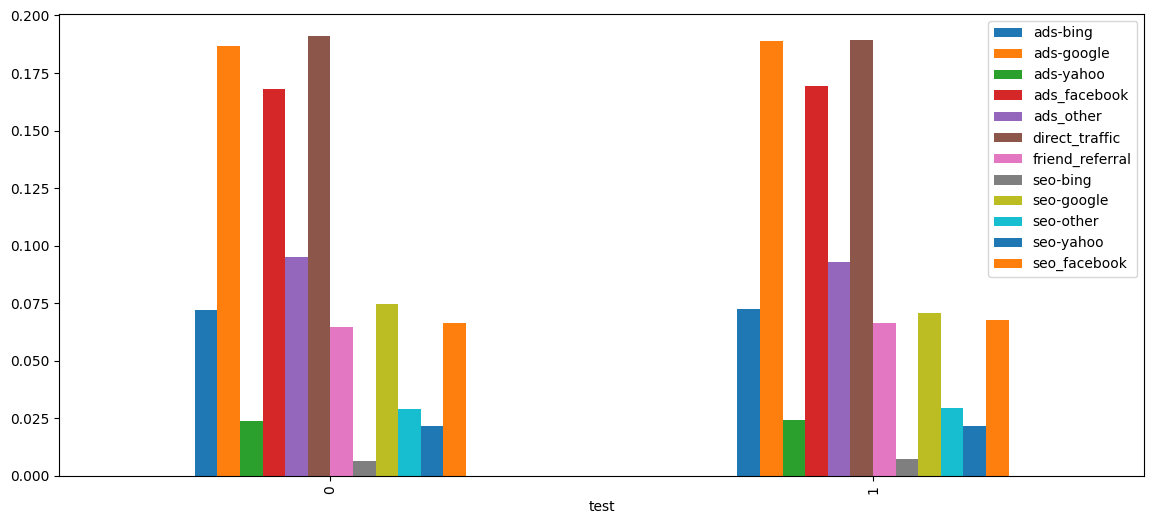

In [21]:
fig, ax = plt.subplots(figsize=(14,6))
r.plot(kind ='bar', ax=ax)
plt.show()

In [24]:
df.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02


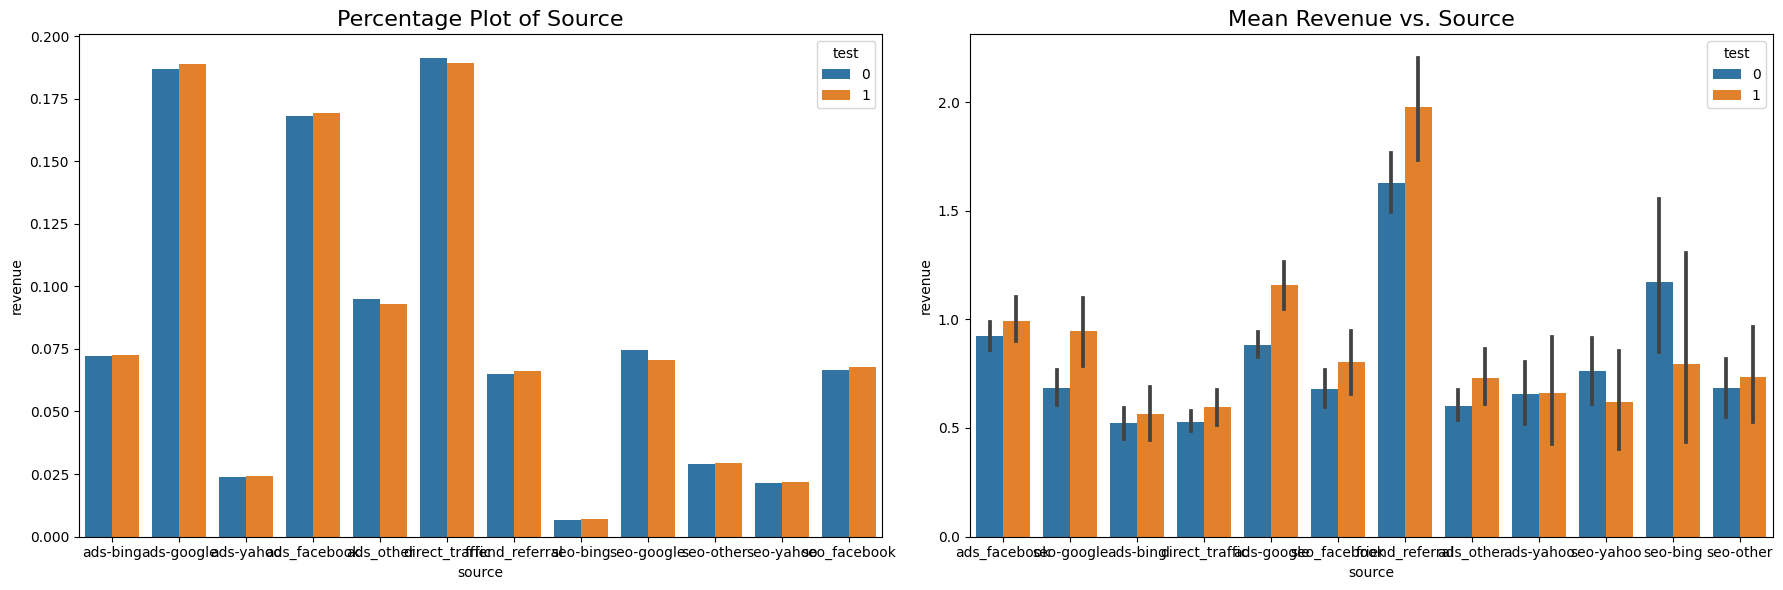

In [94]:
#Viz of the source
count = df[['source', 'test', 'revenue']].groupby(['source', 'test']).count().reset_index()
count.loc[count['test'] == 1, 'revenue'] = count.loc[count['test'] == 1, 'revenue'] / df.loc[df['test']==1, 'user_id'].count()
count.loc[count['test'] == 0, 'revenue'] = count.loc[count['test'] == 0, 'revenue'] / df.loc[df['test']==0, 'user_id'].count()


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.barplot(x='source', y='revenue', hue='test', data=count, ax=ax[0])
ax[0].set_title('Percentage Plot of Source', fontsize=16)

sns.barplot(x='source', y='revenue', hue='test', data=df, ax=ax[1])
ax[1].set_title('Mean Revenue vs. Source', fontsize=16)
plt.tight_layout()
plt.show()

<span style='color: black; font-size: 24px;'>**2.Device**</span>

In [77]:
#Check randominess
r.s = df.groupby('test')['device'].apply(lambda x: x.value_counts(normalize=True)).unstack()
r.s

,mobile,web
test,,
0,0.594365,0.405635
1,0.578469,0.421531


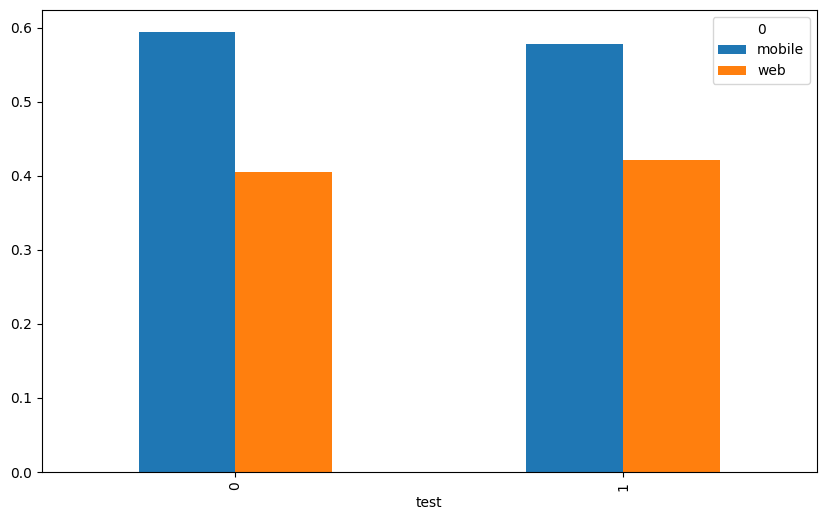

In [87]:
fig, ax = plt.subplots(figsize=(10, 6))
r.s.plot(kind='bar', ax=ax)
plt.show()

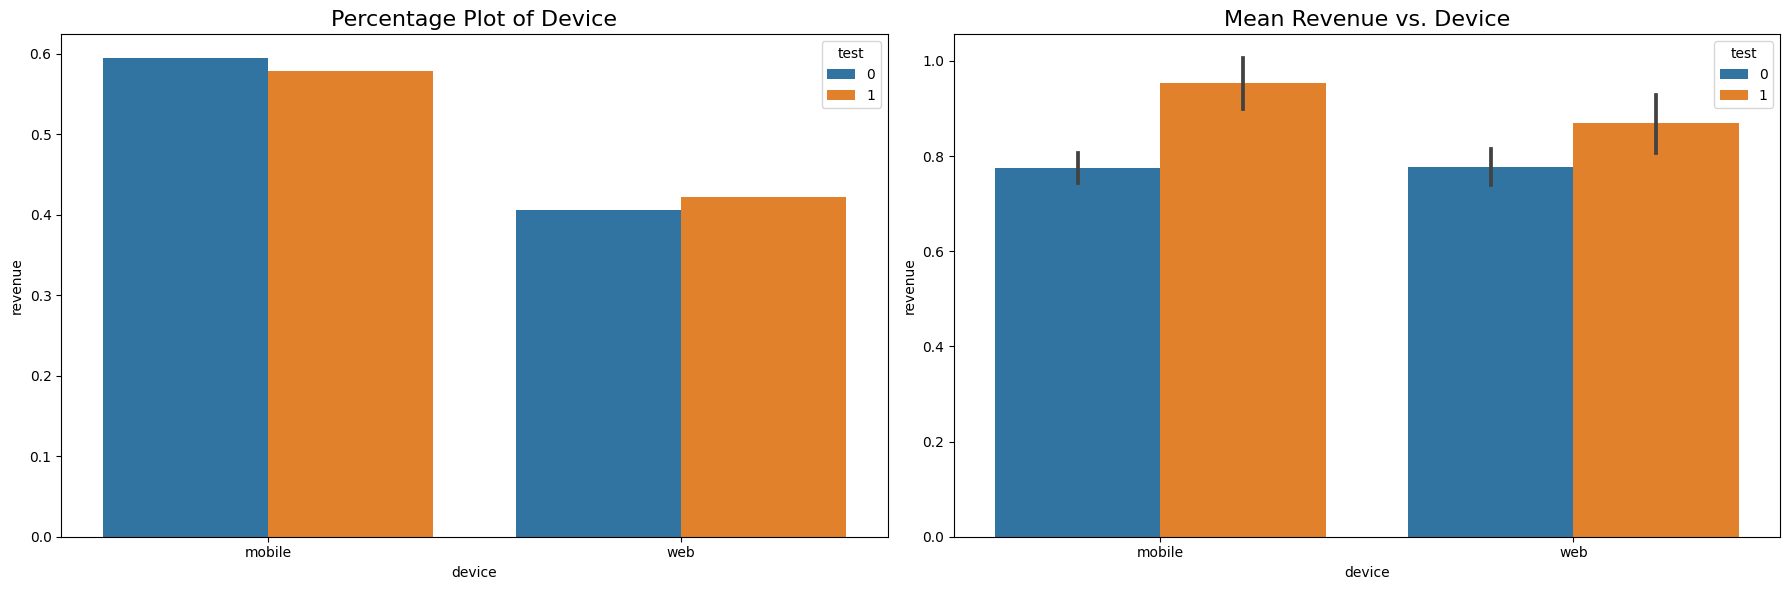

In [93]:
# Viz of the device
count = df[['device', 'test', 'revenue']].groupby(['device', 'test']).count().reset_index()
count.loc[count['test'] == 1, 'revenue'] = count.loc[count['test'] == 1, 'revenue'] / df.loc[df['test']==1, 'user_id'].count()
count.loc[count['test'] == 0, 'revenue'] = count.loc[count['test'] == 0, 'revenue'] / df.loc[df['test']==0, 'user_id'].count()


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.barplot(x='device', y='revenue', hue='test', data=count, ax=ax[0])
ax[0].set_title('Percentage Plot of Device', fontsize=16)

sns.barplot(x='device', y='revenue', hue='test', data=df, ax=ax[1])
ax[1].set_title('Mean Revenue vs. Device', fontsize=16)
plt.tight_layout()
plt.show()

<span style='color: black; font-size: 24px;'>**3.Operation System**</span>

In [91]:
# Check randominess
op = df.groupby('test')['operative_system'].apply(lambda x: x.value_counts(normalize=True)).unstack()
op

,windows,iOS,android,mac,other,linux
test,,,,,,
0,0.313638,0.305125,0.237891,0.080709,0.051754,0.010883
1,0.327718,0.294598,0.234318,0.076459,0.050001,0.016907


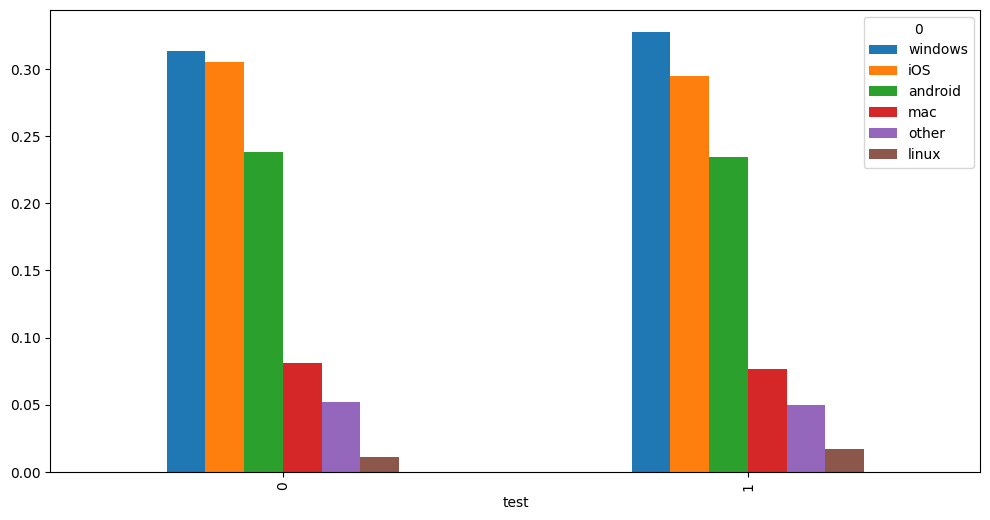

In [92]:
fig, ax = plt.subplots(figsize=(12, 6))
op.plot(kind='bar', ax=ax)
plt.show()

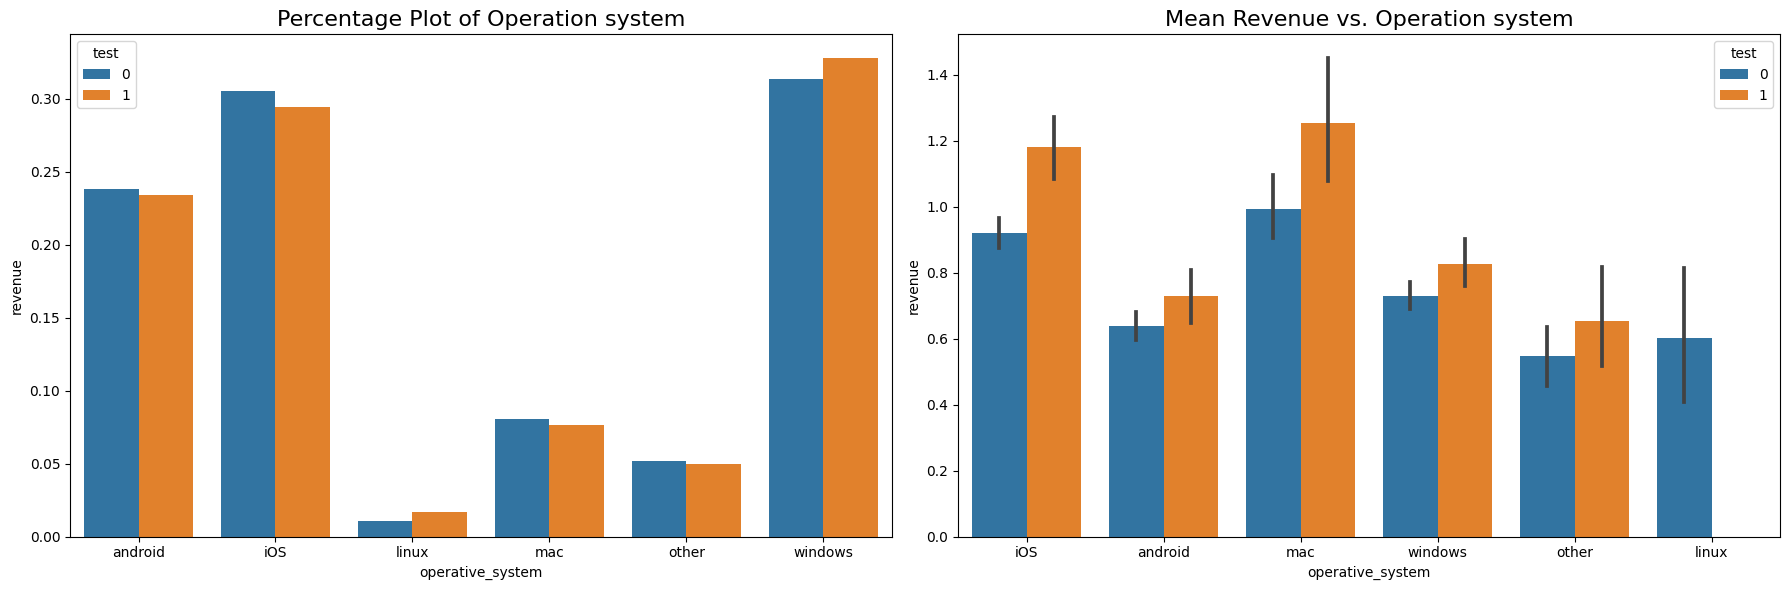

In [98]:
# Viz of the operation system
count = df[['operative_system', 'test', 'revenue']].groupby(['operative_system', 'test']).count().reset_index()
count.loc[count['test'] == 1, 'revenue'] = count.loc[count['test'] == 1, 'revenue'] / df.loc[df['test']==1, 'user_id'].count()
count.loc[count['test'] == 0, 'revenue'] = count.loc[count['test'] == 0, 'revenue'] / df.loc[df['test']==0, 'user_id'].count()


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.barplot(x='operative_system', y='revenue', hue='test', data=count, ax=ax[0])
ax[0].set_title('Percentage Plot of Operation system', fontsize=16)

sns.barplot(x='operative_system', y='revenue', hue='test', data=df, ax=ax[1])
ax[1].set_title('Mean Revenue vs. Operation system', fontsize=16)
plt.tight_layout()
plt.show()

<span style='color: black; font-size: 24px;'>**Q1: A/B test price**</span>

In [106]:
df[['test', 'converted']].groupby('test').mean()

,converted
test,
0,0.019900
1,0.015555


In [105]:
df[['test', 'revenue']].groupby('test').mean()

,revenue
test,
0,0.776083
1,0.917748


Evidently, individuals with lower prices exhibit a higher conversion rate (**1.990%**), whereas those with higher prices experience a lower conversion rate (**1.550%**). However, when considering the price factor, the average revenue for the higher-priced group is actually greater (**0.918**) than that for the lower-priced group (**0.78**)

Now, let's proceed with hypothesis testing:<br>
    - 
Null Hypothesis (H0 T The average revenue of the experimental group is equal to or less than the average revenue of the contr group
<br>
    - .
Alternative Hypothesis (H1): The average revenue of the experimental group is higher than the average revenue of the control group

In [111]:
from scipy.stats import ttest_ind

In [113]:
ctr_val = df[df['test'] == 0]['revenue'].values
exp_val = df[df['test'] == 1]['revenue'].values
print(ttest_ind(ctr_val, exp_val, axis=0, equal_var=False))

TtestResult(statistic=-5.715224666463108, pvalue=1.0972577312420781e-08, df=186141.738219264)


The test mentioned above is originally a two-tailed test. Our objective is to conduct a one-tailed test. Nonetheless, based on the earlier result, we can confidently assert that even in the case of a one-tailed test, we have sufficient evidence to reject the null hypothesis. This leads us to conclude that the average revenue of the experimental group surpasses that of the control group.

While our test implies that price might result in higher average revenue, it's essential to note that the reliability of the above result is compromised due to issues with the A/B test. A more rigorously designed A/B test is required for scientifically accurate conclusions.

<span style='color: black; font-size: 24px;'>**Q2: Converation Rate**</span>

<span style='color: black; font-size: 14px;'>**A: Converation Rate by Source**</span>

In [116]:
df.groupby('source')['converted'].mean().reset_index()

,source,converted
0,ads-bing,0.012001
1,ads-google,0.021502
2,ads-yahoo,0.014793
3,ads_facebook,0.021198
4,ads_other,0.014350
5,direct_traffic,0.012294
6,friend_referral,0.038688
7,seo-bing,0.023787
8,seo-google,0.016978
9,seo-other,0.015686


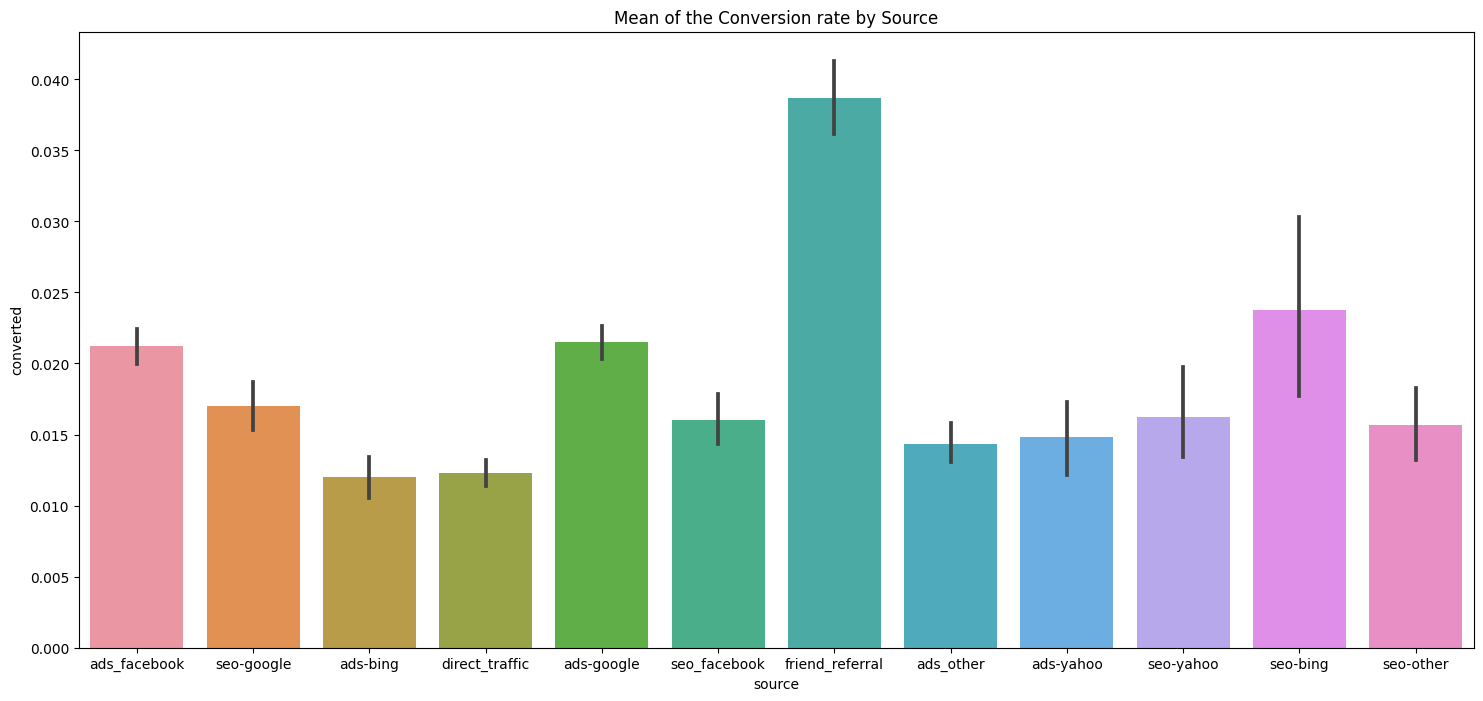

In [121]:
fig, ax = plt.subplots(figsize=(18,8))
sns.barplot(x='source', y='converted', data=df, ax=ax)
ax.set_title('Mean of the Conversion rate by Source')
plt.show()


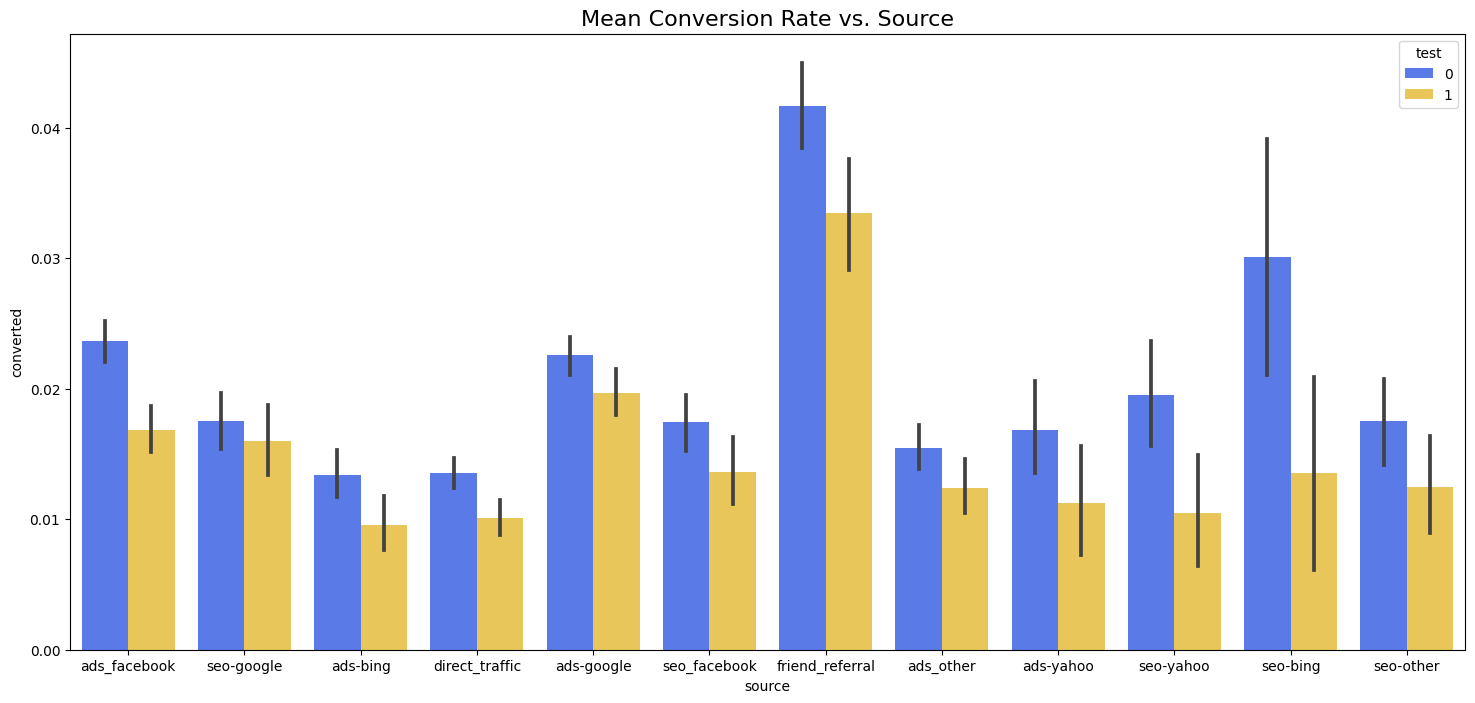

In [123]:
# Visualization of source by test
fig, ax = plt.subplots(figsize=(18, 8))
sns.barplot(x='source', y='converted', hue='test', data=df, ax=ax, palette=['#426eff',"#ffd343"])
ax.set_title('Mean Conversion Rate vs. Source', fontsize=16)
plt.show()

<span style='color: black; font-size: 14px;'>**B: Converation Rate by Device**</span>

In [125]:
df.groupby('device')['converted'].mean().reset_index()

,device,converted
0,mobile,0.018554
1,web,0.018023


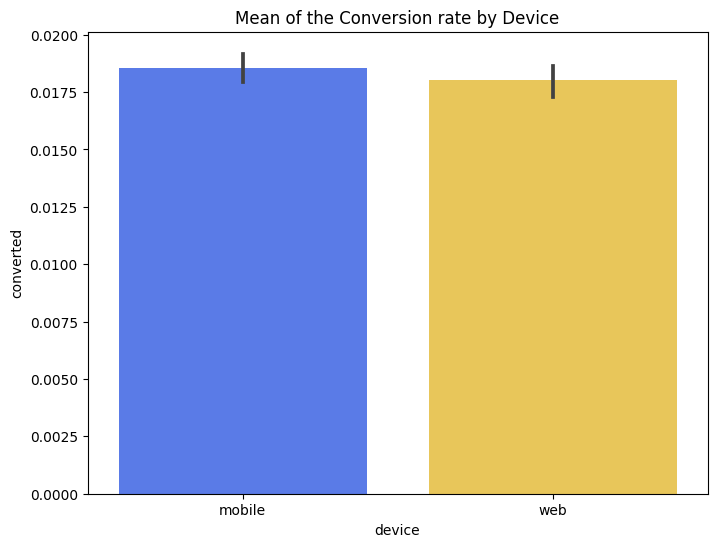

In [127]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='device', y='converted', data=df, ax=ax, palette=['#426eff',"#ffd343"])
ax.set_title('Mean of the Conversion rate by Device')
plt.show()


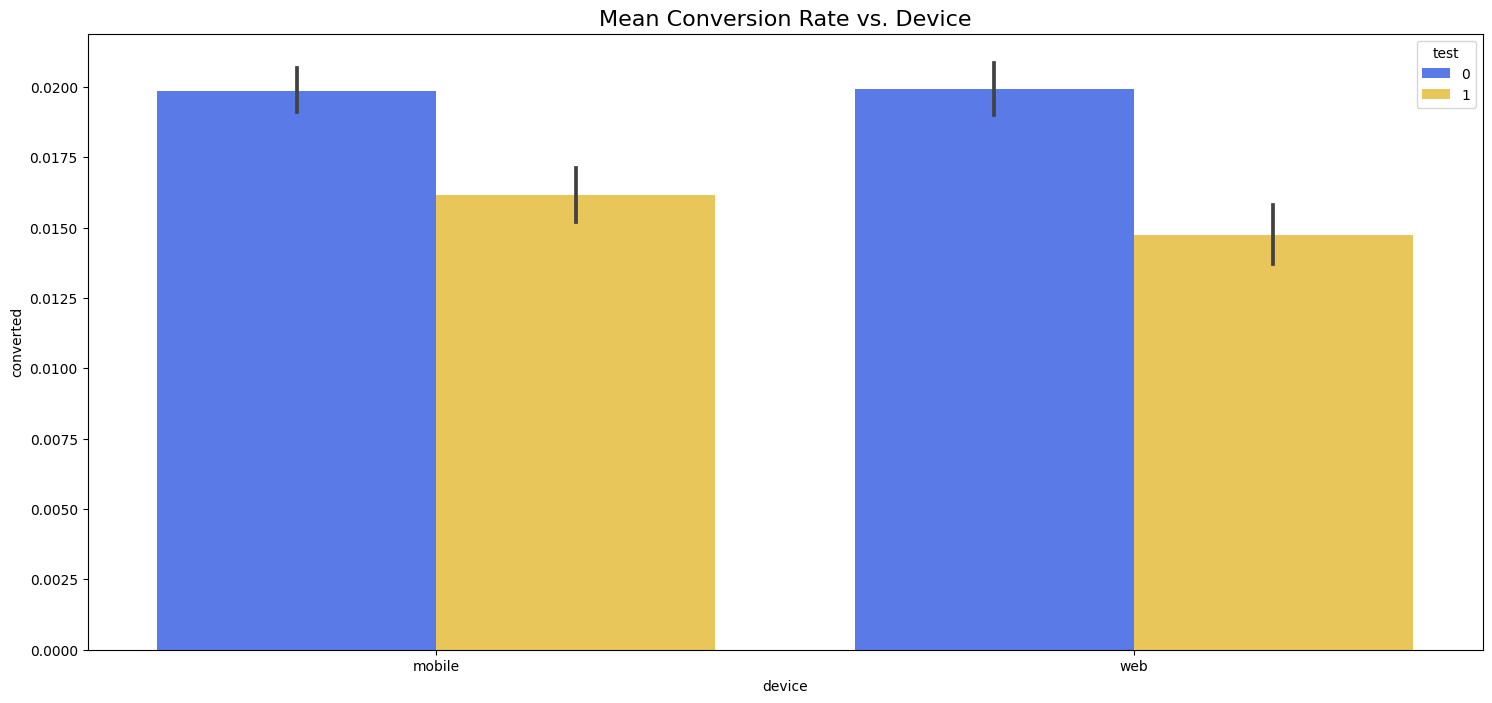

In [128]:
# Visualization of source by test
fig, ax = plt.subplots(figsize=(18, 8))
sns.barplot(x='device', y='converted', hue='test', data=df, ax=ax, palette=['#426eff',"#ffd343"])
ax.set_title('Mean Conversion Rate vs. Device', fontsize=16)
plt.show()

<span style='color: black; font-size: 14px;'>**C: Converation Rate by Operation system**</span>

In [130]:
df.groupby('operative_system')['converted'].mean().reset_index()

,operative_system,converted
0,android,0.014919
1,iOS,0.022328
2,linux,0.008232
3,mac,0.023987
4,other,0.012981
5,windows,0.016966


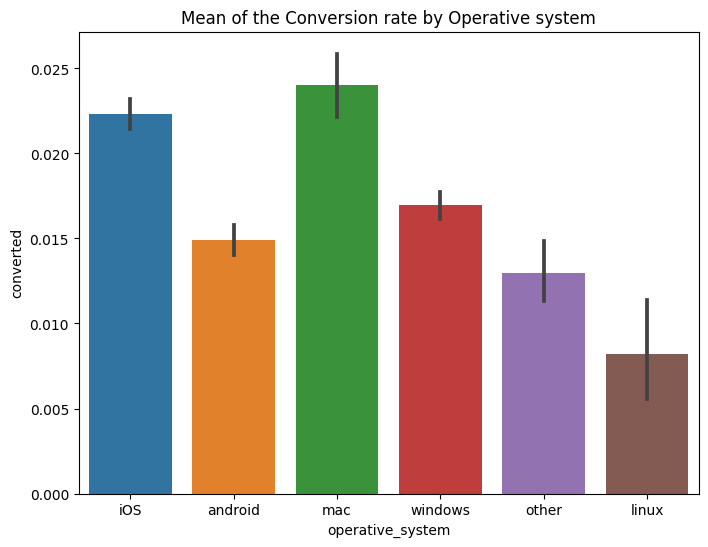

In [131]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='operative_system', y='converted', data=df, ax=ax)
ax.set_title('Mean of the Conversion rate by Operative system')
plt.show()


# Visualization of source by test
fig, ax = plt.subplots(figsize=(18, 8))
sns.barplot(x='operative_system', y='converted', hue='test', data=df, ax=ax, palette=['#426eff',"#ffd343"])
ax.set_title('Mean Conversion Rate vs. Operative system', fontsize=16)
plt.show()

Based on the visualizations presented earlier, it's evident that price significantly impacts the conversion rate. However, in addition to price, several other factors play a role in influencing the conversion rate.
<br>
- Source: Users referred by friends exhibit a substantially higher conversion rate
- Device: The influence of the device on the conversion rate is not statistically significant
- Operation system:Users with Mac and iOS operating systems demonstrate a considerably higher conversion rate.ersion ratersion rate

<span style='color: Purple; font-size: 24px;'>**ACTIONABLE INSIGHTS**</span>

<span style='color: Purple; font-size: 18px;'>***KEY POINTS***</span>

<span style='color: black; font-size: 14px;'>**1.Optimize for Positive factors**</span>

    - Leverage the positive impact of friend referrals, Apple users (MAC or iOS), and lower prices on the conversion rate.
    - Consider special promotions or discounts for Apple users to further boost engagement

<span style='color: black; font-size: 14px;'>**2. Launch Targeted Marketing Programs**</span>

    - Initiate targeted marketing campaigns specifically tailored for Apple users (MAC or iOS).
    -  Implement referral programs that reward users for inviting friends, tapping into the potential of friend referralss

<span style='color: black; font-size: 14px;'>**3. Address the Price Impact**</span>

If there's a need to increase prices (which may negatively affect conversion rates), compensate by reinforcing the other two positive factors.

Ensure that marketing efforts focus on highlighting the value proposition even with adjusted price